Considere o diagrama de blocos abaixo que representa a dinâmica linearizada de um sistema dinâmico

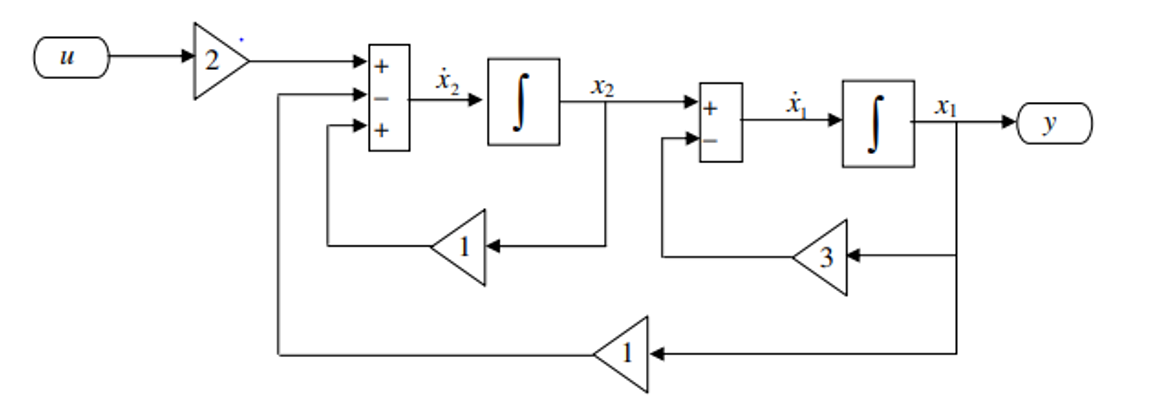

a) Sabendo que a saída do sistema é o estado $x_1$, obtenha a representaçâo do sistema no espaço dos estados.


b) Avalie a controlabilidade do sistema. Utilize o python para ajudar nos cálculos e explique sua decisão

c) Avalie a observabilidade do sistema. Utilize o python para ajudar nos cálculos e explique sua decisão

d) Avalie a controlabilidade da saída  do sistema. Utilize o python para ajudar nos cálculos e explique sua decisão

e) Qual a função de transferência equivalente a esta representação em espaço de estados


In [1]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 6.7 MB/s eta 0:00:00


In [2]:
import control
import numpy as np
#A representação em espaço de estados é dada por:
A=np.array([[-3,1],[-1,1]])
B=np.array([[0],[2]])
C=np.array([[1,0]])
D=np.array([[0]])
G=control.ss(A,B,C,D)
print(G)


<LinearIOSystem>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[-3.  1.]
     [-1.  1.]]

B = [[0.]
     [2.]]

C = [[1. 0.]]

D = [[0.]]



In [7]:
matriz_co=np.array([B,A@B])
matriz_co=matriz_co[:,:,0]

print(matriz_co)
#print(control.ctrb(A,B)) Para conferir
det=np.linalg.det(matriz_co)
print(det)
if det==0:
  print("A matriz não é controlável")
else:
  print("A matriz é controlável")
#Como o determinante é diferente de 0 (det=-4), a matriz é controlável

[[0 2]
 [2 2]]
[[0. 2.]
 [2. 2.]]
-4.0
A matriz é controlável


In [11]:
segunda_c=np.transpose(A)@np.transpose(C)

matriz_obs=np.array([np.transpose(C),segunda_c])
matriz_obs=matriz_obs[:,:,0] #o transpose é porque a matriz não sai da forma certa devido aos arrays
print(matriz_obs)
posto_n=np.linalg.matrix_rank(matriz_obs)
if posto_n==A.shape[0]:
  print("O sistema é observável")
else:
  print("O sistema não é observável")

# print(control.obsv(A, C))
# print(np.linalg.matrix_rank(control.obsv(A, C)))

[[ 1  0]
 [-3  1]]
O sistema é observável
[[ 1.  0.]
 [-3.  1.]]
2


In [5]:
#Controlabilidade da saida
segundacol=C@A
segundacol=segundacol@B

matriz_cosaida=np.array([C@B,segundacol,D])
matriz_cosaida=np.transpose(matriz_cosaida[:,0])

print(matriz_cosaida)
posto=np.linalg.matrix_rank(matriz_cosaida)
if posto==C.shape[0]:
  print("O sistema é de saída controlável")
else:
  print("O sistema não é de saída controlável")

[[0 2 0]]
O sistema é de saída controlável


In [6]:
#Função de transferência que equivale ao espaço de estados:
FT=control.ss2tf(G)
print(FT)



      2
-------------
s^2 + 2 s - 2

